<a href="https://colab.research.google.com/github/IKAR42/SberDS_Study/blob/main/Python_%22Task2%2B3_dmrf_visual_oop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



## Список объектов

# Данные по определенному объекту

In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
# Ставим ограничение на показ максимального количества строк
pd.options.display.max_rows = 100

In [2]:
# Подключаемся к облаку Гугла чтобы достать дата сет
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Подгружаем ранее подготовленный дата сет
df_1 = pd.read_csv('drive/My Drive/Hometask1_1.csv')

### EDA (Разведочный анализ данных)

In [4]:
# Проверяем загрузился ли дата сет
df_1.head(3)

,Unnamed: 0,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,Минимум этажей,Отделка,Грузоподъемность лифтов,Наличие парковки,Наличие велодорожки,Наличие детской площадки,Наличие спортивной площадки,Застройщик,Email застройщика,Тел. застройщика
0,0,13383,NaN,г Тюмень,72,2022-12-31,53109.0,Элитный,68,20,4,NaN,5.0,31,0,1.0,1.0,2МЕН ГРУПП,info@2mengroup.ru,+7(345)279-18-88
1,1,13398,NaN,"г Тюмень, ул Профсоюзная, д. 56",72,2024-12-31,47886.0,Элитный,43,10,7,NaN,3.0,0,0,1.0,1.0,2МЕН ГРУПП,info@2mengroup.ru,+7(345)279-18-88
2,2,13397,NaN,"г Тюмень, ул Профсоюзная, д. 56",72,2024-12-31,45523.0,Элитный,65,12,6,NaN,5.0,0,0,1.0,1.0,2МЕН ГРУПП,info@2mengroup.ru,+7(345)279-18-88


In [5]:
# Смотрим статистики по дата сету
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   5000 non-null   int64  
 1   id                           5000 non-null   int64  
 2   Название обьекта             3750 non-null   object 
 3   Адрес                        4975 non-null   object 
 4   Регион                       5000 non-null   int64  
 5   Срок сдачи                   5000 non-null   object 
 6   Стоимость м.кв.              3321 non-null   float64
 7   Класс жилья                  5000 non-null   object 
 8   Кол-во квартир               5000 non-null   int64  
 9   Максимум этажей              5000 non-null   int64  
 10  Минимум этажей               5000 non-null   int64  
 11  Отделка                      0 non-null      float64
 12  Грузоподъемность лифтов      4963 non-null   float64
 13  Наличие парковки  

In [6]:
# Смотрим статистики по дата сету
df_1.describe()

,Unnamed: 0,id,Регион,Стоимость м.кв.,Кол-во квартир,Максимум этажей,Минимум этажей,Отделка,Грузоподъемность лифтов,Наличие парковки,Наличие велодорожки,Наличие детской площадки,Наличие спортивной площадки
count,5000.000000,5000.000000,5000.000000,3.321000e+03,5000.000000,5000.000000,5000.000000,0.0,4963.000000,5000.00000,5000.000000,4963.000000,4961.000000
mean,2499.500000,39045.573400,47.227400,1.194316e+05,174.396800,12.128800,10.324000,NaN,2.201894,36.55740,0.162600,1.535966,1.377948
std,1443.520003,10770.156185,22.835744,1.330022e+05,222.379109,8.634647,8.038902,NaN,3.524593,117.42702,0.369037,1.774939,1.723553
min,0.000000,1259.000000,1.000000,1.691000e+03,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1249.750000,35170.750000,25.000000,6.483400e+04,30.000000,5.000000,3.000000,NaN,0.000000,0.00000,0.000000,1.000000,0.000000
50%,2499.500000,42828.000000,50.000000,9.026300e+04,104.000000,10.000000,9.000000,NaN,1.000000,0.00000,0.000000,1.000000,1.000000
75%,3749.250000,46516.250000,68.000000,1.320190e+05,240.000000,18.000000,16.000000,NaN,3.000000,0.00000,0.000000,2.000000,1.000000
max,4999.000000,49602.000000,92.000000,2.228709e+06,2522.000000,76.000000,76.000000,NaN,76.000000,3580.00000,1.000000,20.000000,15.000000


In [7]:
# Смотрим какие столбцы есть в дата сете
df_1.columns

Index(['Unnamed: 0', 'id', 'Название обьекта', 'Адрес', 'Регион', 'Срок сдачи',
       'Стоимость м.кв.', 'Класс жилья', 'Кол-во квартир', 'Максимум этажей',
       'Минимум этажей', 'Отделка', 'Грузоподъемность лифтов',
       'Наличие парковки', 'Наличие велодорожки', 'Наличие детской площадки',
       'Наличие спортивной площадки', 'Застройщик', 'Email застройщика',
       'Тел. застройщика'],
      dtype='object')

In [8]:
# Смотрим статистики по дата сету
df_1.shape

(5000, 20)

In [9]:
# Смотрим статистики по дата сету
df_1.nunique()

Unnamed: 0                     5000
id                             5000
Название обьекта               1871
Адрес                          3933
Регион                           79
Срок сдачи                       54
Стоимость м.кв.                3076
Класс жилья                       5
Кол-во квартир                  708
Максимум этажей                  53
Минимум этажей                   47
Отделка                           0
Грузоподъемность лифтов          33
Наличие парковки                393
Наличие велодорожки               2
Наличие детской площадки         15
Наличие спортивной площадки      12
Застройщик                     1589
Email застройщика              1377
Тел. застройщика               1395
dtype: int64

In [10]:
# Дропаем столбец "Отделка" - так как он пустой
df_1_clean = df_1.drop(['Отделка'], axis=1)
#удаляем дубликаты
df_1_clean = df_1_clean.drop_duplicates()

In [11]:
# Переименовываем столбцов
df_1_clean.rename(columns={'Наличие парковки': 'Парковочные места', 'Наличие детской площадки': 'Детские площадки', 'Наличие спортивной площадки': 'Спортивные площадки'}, inplace=True)
df_1_clean.columns

Index(['Unnamed: 0', 'id', 'Название обьекта', 'Адрес', 'Регион', 'Срок сдачи',
       'Стоимость м.кв.', 'Класс жилья', 'Кол-во квартир', 'Максимум этажей',
       'Минимум этажей', 'Грузоподъемность лифтов', 'Парковочные места',
       'Наличие велодорожки', 'Детские площадки', 'Спортивные площадки',
       'Застройщик', 'Email застройщика', 'Тел. застройщика'],
      dtype='object')

In [12]:
#удаление строк где заполнено значение NaN
df_1_clean = df_1_clean[~df_1_clean['Название обьекта'].isnull()]
df_1_clean = df_1_clean[~df_1_clean['Детские площадки'].isnull()]
df_1_clean = df_1_clean[~df_1_clean['Спортивные площадки'].isnull()]

In [13]:
# Перевожу из формата obj в dt столбец "Срок сдачи"
df_1_clean['Срок сдачи'] = pd.to_datetime(df_1_clean['Срок сдачи'])
df_1_clean['Срок сдачи']

5      2023-03-31
8      2024-09-30
9      2023-06-30
10     2023-06-30
14     2023-03-31
          ...    
4994   2026-09-30
4995   2026-09-30
4997   2023-12-31
4998   2024-03-31
4999   2025-06-30
Name: Срок сдачи, Length: 3721, dtype: datetime64[ns]

In [14]:
# Делаю дополнительный столбец, где будет записан только год сдачи
df_1_clean['Год сдачи'] = pd.to_datetime(df_1_clean['Срок сдачи']).dt.strftime('%Y') 
df_1_clean.head(3)

,Unnamed: 0,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,Минимум этажей,Грузоподъемность лифтов,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Email застройщика,Тел. застройщика,Год сдачи
5,5,10891,"Жилой комплекс ""Рафинад""","г Вологда, ул Медуницинская, д. 7",35,2023-03-31,44771.0,Комфорт,225,16,16,3.0,0,0,1.0,1.0,АКЦИОНЕРНАЯ АГРОСТРОИТЕЛЬНАЯ КОМПАНИЯВОЛОГДААГ...,vologdaagrostroy@yandex.ru,+7(817)274-79-00,2023
8,8,39176,"ЖК ""FRESH"" (ЖК ""ФРЕШ"" литер 4)","г Краснодар, улица Валерия Гассия, д. 4/7, лит...",23,2024-09-30,103761.0,Комфорт,198,25,25,3.0,0,0,5.0,5.0,АВА ДЕВЕЛОПМЕНТ ПЛЮС,elreg@ask-yug.com,+7(800)222-10-10,2024
9,9,39175,"ЖК ""FRESH"" (ЖК ""ФРЕШ"" литер 3)","г Краснодар, улица Валерия Гассия, д. 4/7, лит...",23,2023-06-30,102841.0,Комфорт,396,25,25,6.0,0,0,5.0,5.0,АВА ДЕВЕЛОПМЕНТ ПЛЮС,elreg@ask-yug.com,+7(800)222-10-10,2023


In [15]:
# Делаю дополнительный столбец, где будет записан только месяц сдачи
df_1_clean['Месяц сдачи'] = pd.to_datetime(df_1_clean['Срок сдачи']).dt.strftime('%m') 
df_1_clean.head(3)

,Unnamed: 0,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,...,Грузоподъемность лифтов,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Email застройщика,Тел. застройщика,Год сдачи,Месяц сдачи
5,5,10891,"Жилой комплекс ""Рафинад""","г Вологда, ул Медуницинская, д. 7",35,2023-03-31,44771.0,Комфорт,225,16,...,3.0,0,0,1.0,1.0,АКЦИОНЕРНАЯ АГРОСТРОИТЕЛЬНАЯ КОМПАНИЯВОЛОГДААГ...,vologdaagrostroy@yandex.ru,+7(817)274-79-00,2023,03
8,8,39176,"ЖК ""FRESH"" (ЖК ""ФРЕШ"" литер 4)","г Краснодар, улица Валерия Гассия, д. 4/7, лит...",23,2024-09-30,103761.0,Комфорт,198,25,...,3.0,0,0,5.0,5.0,АВА ДЕВЕЛОПМЕНТ ПЛЮС,elreg@ask-yug.com,+7(800)222-10-10,2024,09
9,9,39175,"ЖК ""FRESH"" (ЖК ""ФРЕШ"" литер 3)","г Краснодар, улица Валерия Гассия, д. 4/7, лит...",23,2023-06-30,102841.0,Комфорт,396,25,...,6.0,0,0,5.0,5.0,АВА ДЕВЕЛОПМЕНТ ПЛЮС,elreg@ask-yug.com,+7(800)222-10-10,2023,06


In [16]:
# Делаю дополнительный столбец, где будет записан только прогнозный день недели, в которую будет сдан обьект
df_1_clean['День недели сдачи'] = df_1_clean['Срок сдачи'].dt.day_name()
df_1_clean.head(3)

,Unnamed: 0,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,...,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Email застройщика,Тел. застройщика,Год сдачи,Месяц сдачи,День недели сдачи
5,5,10891,"Жилой комплекс ""Рафинад""","г Вологда, ул Медуницинская, д. 7",35,2023-03-31,44771.0,Комфорт,225,16,...,0,0,1.0,1.0,АКЦИОНЕРНАЯ АГРОСТРОИТЕЛЬНАЯ КОМПАНИЯВОЛОГДААГ...,vologdaagrostroy@yandex.ru,+7(817)274-79-00,2023,03,Friday
8,8,39176,"ЖК ""FRESH"" (ЖК ""ФРЕШ"" литер 4)","г Краснодар, улица Валерия Гассия, д. 4/7, лит...",23,2024-09-30,103761.0,Комфорт,198,25,...,0,0,5.0,5.0,АВА ДЕВЕЛОПМЕНТ ПЛЮС,elreg@ask-yug.com,+7(800)222-10-10,2024,09,Monday
9,9,39175,"ЖК ""FRESH"" (ЖК ""ФРЕШ"" литер 3)","г Краснодар, улица Валерия Гассия, д. 4/7, лит...",23,2023-06-30,102841.0,Комфорт,396,25,...,0,0,5.0,5.0,АВА ДЕВЕЛОПМЕНТ ПЛЮС,elreg@ask-yug.com,+7(800)222-10-10,2023,06,Friday


In [17]:
df_1_clean['День недели сдачи'].unique()

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [18]:
# Перевести в int столбец Грузоподъемность лифтов, Наличие детской площадки,Наличие спортивной площадки и Стоимость м.кв.
df_1_clean = df_1_clean.astype({"Грузоподъемность лифтов": "Int64", "Детские площадки": "Int64", "Спортивные площадки": "Int64", "Стоимость м.кв.": "Int64"})
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3721 entries, 5 to 4999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               3721 non-null   int64         
 1   id                       3721 non-null   int64         
 2   Название обьекта         3721 non-null   object        
 3   Адрес                    3696 non-null   object        
 4   Регион                   3721 non-null   int64         
 5   Срок сдачи               3721 non-null   datetime64[ns]
 6   Стоимость м.кв.          2659 non-null   Int64         
 7   Класс жилья              3721 non-null   object        
 8   Кол-во квартир           3721 non-null   int64         
 9   Максимум этажей          3721 non-null   int64         
 10  Минимум этажей           3721 non-null   int64         
 11  Грузоподъемность лифтов  3721 non-null   Int64         
 12  Парковочные места        3721 non-

In [19]:
# Дропаем столбец "Email застройщика" и "Тел. застройщика" - так как использовать в анализе не будем
# Дропаем столбец 'Unnamed: 0', которые дублирует индексы таблицы
df_1_clean = df_1_clean.drop(['Email застройщика'], axis=1)
df_1_clean = df_1_clean.drop(['Тел. застройщика'], axis=1)
df_1_clean = df_1_clean.drop(['Unnamed: 0'], axis=1)

In [20]:
df_1_clean.columns

Index(['id', 'Название обьекта', 'Адрес', 'Регион', 'Срок сдачи',
       'Стоимость м.кв.', 'Класс жилья', 'Кол-во квартир', 'Максимум этажей',
       'Минимум этажей', 'Грузоподъемность лифтов', 'Парковочные места',
       'Наличие велодорожки', 'Детские площадки', 'Спортивные площадки',
       'Застройщик', 'Год сдачи', 'Месяц сдачи', 'День недели сдачи'],
      dtype='object')

In [21]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3721 entries, 5 to 4999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       3721 non-null   int64         
 1   Название обьекта         3721 non-null   object        
 2   Адрес                    3696 non-null   object        
 3   Регион                   3721 non-null   int64         
 4   Срок сдачи               3721 non-null   datetime64[ns]
 5   Стоимость м.кв.          2659 non-null   Int64         
 6   Класс жилья              3721 non-null   object        
 7   Кол-во квартир           3721 non-null   int64         
 8   Максимум этажей          3721 non-null   int64         
 9   Минимум этажей           3721 non-null   int64         
 10  Грузоподъемность лифтов  3721 non-null   Int64         
 11  Парковочные места        3721 non-null   int64         
 12  Наличие велодорожки      3721 non-

In [22]:
# Проверим количественные данные на предмет выбросов
# Используя этот код, подставлял разные значения столбцов 
df_1_clean_test = df_1_clean.sort_values(by=['Кол-во квартир'], ascending=[False])
df_1_clean_test.head(3)

,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,Минимум этажей,Грузоподъемность лифтов,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Год сдачи,Месяц сдачи,День недели сдачи
1340,26459,ЖК ГАВАНЬ КАПИТАНОВ,г Санкт-Петербург,78,2022-12-31,135139,Комфорт,2522,19,1,49,1013,1,4,2,МОРСКАЯ СТРОИТЕЛЬНАЯ КОМПАНИЯ,2022,12,Saturday
3239,37486,"ЖК ""Профит""","г Москва, район Нижегородский",77,2023-06-30,234326,Комфорт,2330,33,27,17,538,0,4,3,СПЕЦИАЛИЗИРОВАННЫЕ ЗАСТРОЙЩИК ГРАНЕЛЬ ГРАД,2023,06,Friday
3117,46925,"Жилой комплекс""Амурский парк""","г Москва, район Гольяново, Улица Амурская",77,2025-06-30,259554,Типовой,2131,35,3,4,442,0,1,1,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ГЛОРИ,2025,06,Monday


In [23]:
# Проверим количественные данные на предмет выбросов
# Отдельно посмотрим на наличие выбросов в данных о стоимости
# По факту проверок обнаружены значения <NA>, которые будут мешать анализу
df_1_clean_test = df_1_clean.sort_values(by=['Стоимость м.кв.'], ascending=[True])
df_1_clean_test.tail(3)

,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,Минимум этажей,Грузоподъемность лифтов,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Год сдачи,Месяц сдачи,День недели сдачи
4941,46988,"Жилой комплекс ""Левенцовка Парк"" (ЖК ""Левенцов...","г Ростов-на-Дону, район Советский, корпус 8-1",61,2025-03-31,<NA>,Типовой,180,22,22,1,0,0,1,1,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЛЕВЕНЦОВКА ПАРК,2025,03,Monday
4981,43363,"Семейный квартал ""Добрый""",г Екатеринбург,66,2023-09-30,<NA>,Комфорт,0,1,1,0,138,0,0,0,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЛИДЕР КОНСТРАКШН,2023,09,Saturday
4989,47986,"Жилой комплекс ""Осенний лист"" (ж.д.№ 1)","г Оренбург, улица Юркина, д. 1 (стр.)",56,2024-06-30,<NA>,Типовой,720,24,17,4,0,0,1,1,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЛИСТСИТИ,2024,06,Sunday


In [24]:
# Оставляем в таблице значения колонки Стоимость м.кв., которые не равны '<NA>'
df_1_clean = df_1_clean[df_1_clean['Стоимость м.кв.'] != '<NA>']

In [25]:
# Проверяем что получилось в итоге
# Значения удалены
df_1_clean = df_1_clean.sort_values(by=['Стоимость м.кв.'], ascending=[False])
df_1_clean.tail(3)

,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,Минимум этажей,Грузоподъемность лифтов,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Год сдачи,Месяц сдачи,День недели сдачи
1424,5135,"Квартал ""Татлин""","г Екатеринбург, улица 3-го Интернационала, д. 1а",66,2023-06-30,2000,Комфорт,0,1,1,0,0,1,1,1,НОВЫЙ ЗАСТРОЙЩИК,2023,06,Friday
1178,14231,Цветной город,г Санкт-Петербург,78,2024-12-31,2000,Комфорт,561,25,25,2,0,0,1,1,ЛСР.НЕДВИЖИМОСТЬ-СЕВЕРО-ЗАПАД,2024,12,Tuesday
1144,41380,"""Ручьи""",NaN,78,2024-09-30,2000,Комфорт,266,21,21,2,0,0,0,0,ЛСР.НЕДВИЖИМОСТЬ-СЕВЕРО-ЗАПАД,2024,09,Monday


In [26]:
# Отсортируем значения таблицы по id и объявим новый df_2...
df_2_clean = df_1_clean.sort_values(by=['id'], ascending=[True])
df_2_clean.head(3)

,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,Минимум этажей,Грузоподъемность лифтов,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Год сдачи,Месяц сдачи,День недели сдачи
1044,1259,"""СМАРТ дом на Новоселов""","г Рязань, улица Бугровка, д. 0",62,2023-12-31,63806,Типовой,440,27,27,4,0,0,1,0,КРИСТАЛЛ,2023,12,Sunday
1693,1284,"Жилой Комплекс ""Мир Митино"" (сокращенное наиме...","г Москва, район внутригородское муниципальное ...",77,2024-12-31,40330,Типовой,1115,27,27,14,0,0,1,2,РОЖДЕСТВЕНО,2024,12,Tuesday
2742,1804,"Жилой комплекс ""Цветочный город"" 7-ой этап стр...","г Ижевск, район Индустриальный",18,2022-12-31,72368,Комфорт,168,8,8,3,0,0,1,1,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ВОСТОК,2022,12,Saturday


In [27]:
# Переиндексируем датафрейм после очистки, чтобы избежать пропусков в индексах
df_2_clean = df_2_clean.reset_index(drop=True)
df_2_clean.head(5)

,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,Минимум этажей,Грузоподъемность лифтов,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Год сдачи,Месяц сдачи,День недели сдачи
0,1259,"""СМАРТ дом на Новоселов""","г Рязань, улица Бугровка, д. 0",62,2023-12-31,63806,Типовой,440,27,27,4,0,0,1,0,КРИСТАЛЛ,2023,12,Sunday
1,1284,"Жилой Комплекс ""Мир Митино"" (сокращенное наиме...","г Москва, район внутригородское муниципальное ...",77,2024-12-31,40330,Типовой,1115,27,27,14,0,0,1,2,РОЖДЕСТВЕНО,2024,12,Tuesday
2,1804,"Жилой комплекс ""Цветочный город"" 7-ой этап стр...","г Ижевск, район Индустриальный",18,2022-12-31,72368,Комфорт,168,8,8,3,0,0,1,1,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ВОСТОК,2022,12,Saturday
3,1805,"Жилой комплекс ""Цветочный город"" 8-ой этап стр...","г Ижевск, район Индустриальный",18,2024-06-30,62875,Комфорт,168,8,8,3,0,0,1,1,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ВОСТОК,2024,06,Sunday
4,1863,Бизнес-центр «Романов»,"г Челябинск, район Курчатовский, пр-кт Комсомо...",74,2022-06-30,35389,Бизнес,0,7,6,0,0,0,0,0,МЕРКАДА,2022,06,Thursday


## EDA + очистка окончены. Переходим к визуализации

Справочник с расшифровкой регионов России
https://www.consultant.ru/document/cons_doc_LAW_108669/88a12659e7cc781c56303430d98ae6c8a683892a/

### Homework 2 

**Задание 1**

In [28]:
# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
from pylab import rcParams

In [29]:
# Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
# Делаем срез данных, чтобы не повредить основной дата сет
df_3_clean = df_2_clean.copy()

In [30]:
# Оставляем 2 столбца необходимых для аналитики
df_3_clean = df_3_clean[['Регион','Стоимость м.кв.']]
df_3_clean.head(3)

,Регион,Стоимость м.кв.
0,62,63806
1,77,40330
2,18,72368


In [31]:
# Делаем группировку стоимости по регионам + считаем среднее для каждого региона
df_mean = df_3_clean.groupby('Регион')['Стоимость м.кв.'].mean().reset_index()
df_mean.head(3)

,Регион,Стоимость м.кв.
0,1,65906.76
1,2,94689.333333
2,3,46826.090909


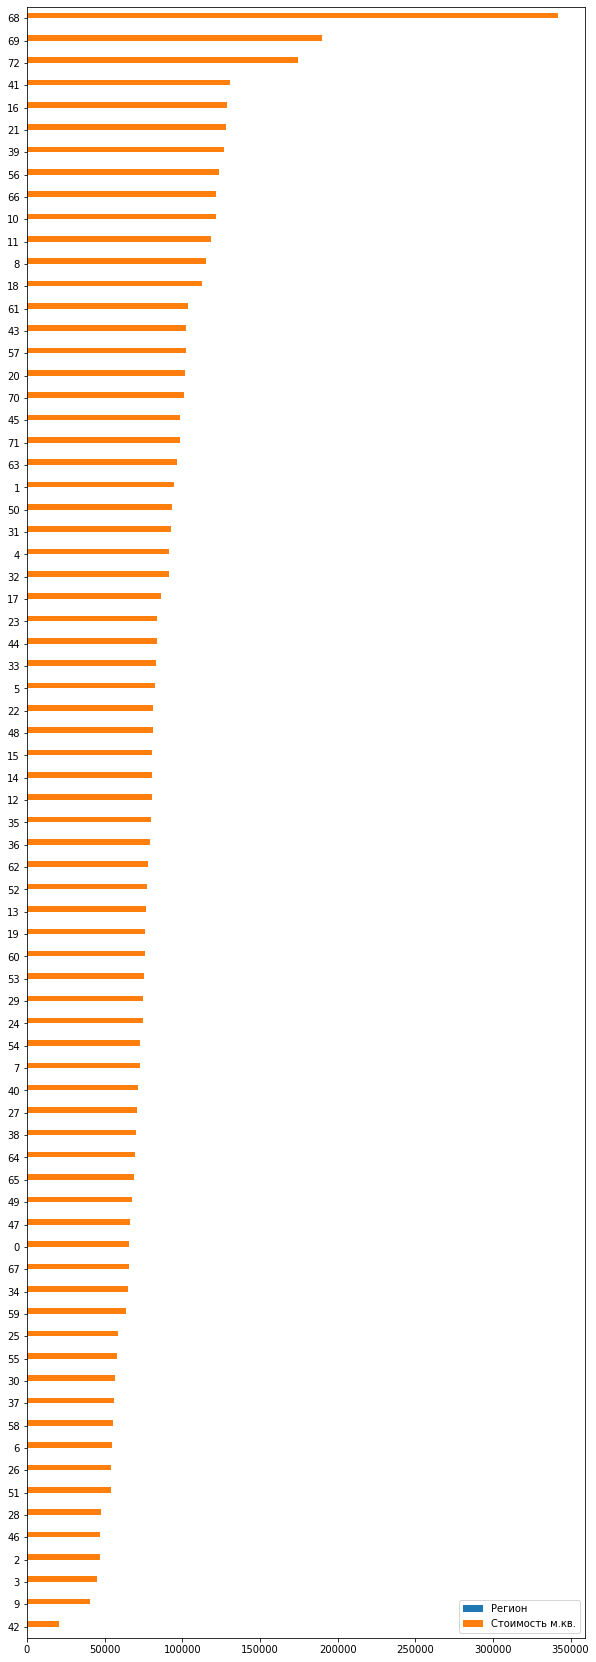

In [32]:
# Строим график
rcParams['figure.figsize'] = 10,30
df_mean.sort_values(by = 'Стоимость м.кв.', ascending=True).plot(kind='barh')
plt.show()

## **Вывод:** 
1. 68 регион (Тамбовская область) - потенциально может быть выбросом (слишком большая разница с предшественником)
2. 69 регион (Тверская область) - согласно данным имеет самую высокую стоимость метра квадратного в новостройке
3. 42 регион (Кемеровская область) - согласно данным имеет самую низкую стоимость метра квадратного в новостройке
4. Кажется странным полученный выше результат. Возможно наш.дом.рф использует какой то свой справочник кодов регионов, который мапится с общедоступным.

**Задание 2**

In [33]:
# Рассчитать объемы вводимого жилья по регионам 
# Делаем срез данных, чтобы не повредить основной дата сет
df_4_clean = df_2_clean.copy()

In [34]:
# Оставляем 2 столбца необходимых для аналитики
df_4_clean = df_4_clean[['Регион','id']]
df_4_clean.head(3)

,Регион,id
0,62,1259
1,77,1284
2,18,1804


In [35]:
# Делаем агрегат для визуализации
df_houses = df_4_clean.groupby('Регион')['id'].count().sort_values(ascending=True)
df_houses.head()

Регион
68    1
13    1
51    1
75    2
17    2
Name: id, dtype: int64

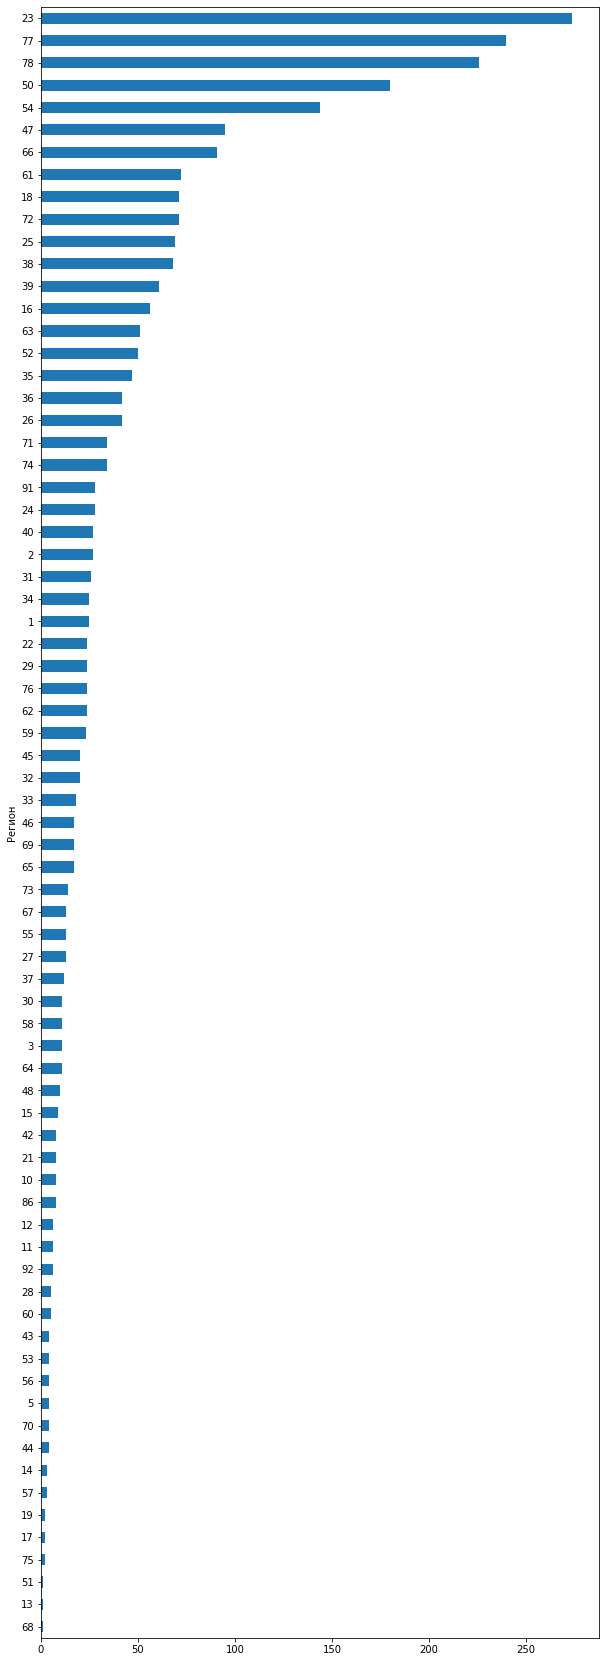

In [36]:
# Визуализируем
rcParams['figure.figsize'] = 10,30
df_houses.plot(kind='barh')
plt.show()

**Вывод:**
1. Больше всего вводится жилья за исследуемый период в 23 регионе (Краснодарский край)
2. Меньше всего жилья вводится за исследуемый период в 68 регионе (Тамбовская область)

Пик и пинимум строющихся новостроек сосредоточен в южной части страны

**Задание 3**

In [37]:
# Рассчитать объемы вводимого жилья по регионам по годам.
# Делаем срез данных, чтобы не повредить основной дата сет
df_5_clean = df_2_clean.copy()

In [38]:
df_5_clean.head(3)

,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,Минимум этажей,Грузоподъемность лифтов,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Год сдачи,Месяц сдачи,День недели сдачи
0,1259,"""СМАРТ дом на Новоселов""","г Рязань, улица Бугровка, д. 0",62,2023-12-31,63806,Типовой,440,27,27,4,0,0,1,0,КРИСТАЛЛ,2023,12,Sunday
1,1284,"Жилой Комплекс ""Мир Митино"" (сокращенное наиме...","г Москва, район внутригородское муниципальное ...",77,2024-12-31,40330,Типовой,1115,27,27,14,0,0,1,2,РОЖДЕСТВЕНО,2024,12,Tuesday
2,1804,"Жилой комплекс ""Цветочный город"" 7-ой этап стр...","г Ижевск, район Индустриальный",18,2022-12-31,72368,Комфорт,168,8,8,3,0,0,1,1,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ВОСТОК,2022,12,Saturday


In [39]:
# Делаем агрегат
df_region_year = df_5_clean.groupby(['Регион', 'Год сдачи'])[['id']].count()
df_region_year.head(10)

id
Регион Год сдачи    
1      2022        2
       2023       16
       2024        7
2      2022        4
       2023       10
       2024       10
       2025        3
3      2022        5
       2023        6
5      2023        2

In [40]:
# Переиндексируем полученный полученный результат, чтобы получилась таблица с 3 столбцами, а не с одним
df_region1 = df_region_year.reset_index(level=['Регион', 'Год сдачи'])
df_region1.head(10)

,Регион,Год сдачи,id
0,1,2022,2
1,1,2023,16
2,1,2024,7
3,2,2022,4
4,2,2023,10
5,2,2024,10
6,2,2025,3
7,3,2022,5
8,3,2023,6
9,5,2023,2


In [41]:
df_region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Регион     263 non-null    int64 
 1   Год сдачи  263 non-null    object
 2   id         263 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.3+ KB


In [42]:
# В виду того, что результат получился в виде большой таблицы, для удобства сохранил результат в виде эксель файла на облаке
df_region1.to_excel("./drive/MyDrive/Region_Year2.xlsx", index=False)

In [43]:
# Сгруппируем данные относительно количества строящегося жилья 
df_region3 = df_region1.groupby('Год сдачи')['id'].count().sort_values(ascending=True)
df_region3

Год сдачи
2021     1
2029     1
2030     1
2031     2
2028     5
2027     8
2026    15
2025    41
2022    54
2024    64
2023    71
Name: id, dtype: int64

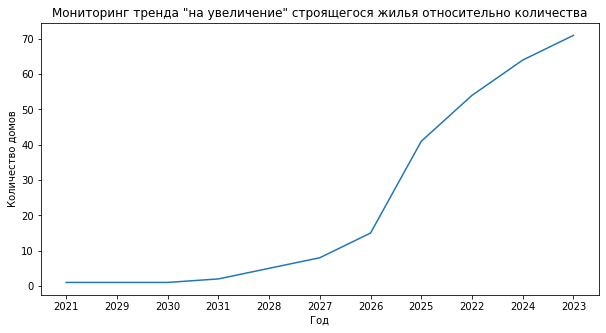

In [44]:
# Визуализируем полученный результат
rcParams['figure.figsize'] = 10,5
plt.plot(df_region3)
plt.title('Мониторинг тренда "на увеличение" строящегося жилья относительно количества')
plt.xlabel('Год')
plt.ylabel('Количество домов')
plt.show()

In [45]:
# Сгруппируем данные относительно года строящегося жилья 
df_region4 = df_region1.groupby('Год сдачи')['id'].count()
df_region4

Год сдачи
2021     1
2022    54
2023    71
2024    64
2025    41
2026    15
2027     8
2028     5
2029     1
2030     1
2031     2
Name: id, dtype: int64

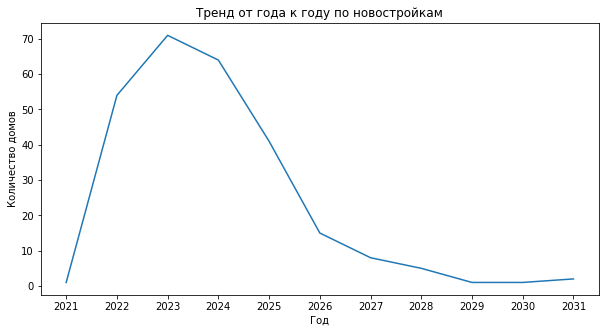

In [46]:
# Визуализируем полученный результат
rcParams['figure.figsize'] = 10,5
plt.plot(df_region4)
plt.title('Тренд от года к году по новостройкам')
plt.xlabel('Год')
plt.ylabel('Количество домов')
plt.show()

**Вывод:** 
* Наибольшее количество жилья планируется сдать в 2023 году, далее идет 2024 и на третьем уходящий 2022
* Есть новостройки, которые должны были быть сданы в 2021, но еще числятся на сайте с прогнозом сдачи (потенциальная задержка сдачи)
* Наблюдается резкий нисходящий тренд по сдаваемым новостройкам от 2023 до 2026 (включительно). Возможно это влияние экономики из за новостного фона


**Задание 4**

In [47]:
# Сравнить этажность домов в разных регионах
df_6_clean = df_2_clean.copy()

In [48]:
# Оставляем столбцы необходимые для аналитики
df_6_clean = df_6_clean[['Регион','id','Максимум этажей','Минимум этажей']]
df_6_clean.head(3)

,Регион,id,Максимум этажей,Минимум этажей
0,62,1259,27,27
1,77,1284,27,27
2,18,1804,8,8


In [49]:
df_6_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2659 entries, 0 to 2658
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Регион           2659 non-null   int64
 1   id               2659 non-null   int64
 2   Максимум этажей  2659 non-null   int64
 3   Минимум этажей   2659 non-null   int64
dtypes: int64(4)
memory usage: 83.2 KB


In [50]:
# Вычисляем регион в котором самое высокое значение среди средних значений "Максимум этажей"
df_floors_1 = df_6_clean.groupby('Регион')['Максимум этажей'].mean().sort_values(ascending=False).head(5)
df_floors_1

Регион
77    24.225000
2     21.629630
48    21.000000
56    20.500000
66    20.142857
Name: Максимум этажей, dtype: float64

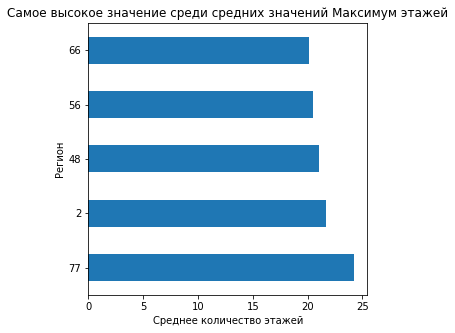

In [51]:
# Визуализируем топ 5 значений
rcParams['figure.figsize'] = 5,5
df_floors_1.plot(kind='barh') 
plt.title("Самое высокое значение среди средних значений Максимум этажей")
plt.xlabel('Среднее количество этажей')
plt.ylabel('Регион')
plt.show()

In [52]:
# Вычисляем регион в котором самое высокое значение среди средних значений "Минимум этажей"
df_floors_2 = df_6_clean.groupby('Регион')['Минимум этажей'].mean().sort_values(ascending=False).head(5)
df_floors_2

Регион
48    20.000000
2     19.444444
62    17.125000
13    17.000000
70    17.000000
Name: Минимум этажей, dtype: float64

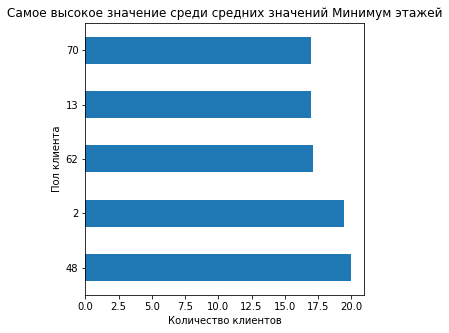

In [53]:
# Визуализируем топ 5 значений
rcParams['figure.figsize'] = 5,5
df_floors_2.plot(kind='barh') 
plt.title("Самое высокое значение среди средних значений Минимум этажей")
plt.xlabel('Количество клиентов')
plt.ylabel('Пол клиента')
plt.show()

In [54]:
# Вычисляем регион в котором самое высокое значение среди значений "Максимум этажей"
df_floors_3 = df_6_clean.groupby('Регион')['Максимум этажей'].max().sort_values(ascending=False).head(5)
df_floors_3

Регион
77    76
66    37
50    34
61    32
54    32
Name: Максимум этажей, dtype: int64

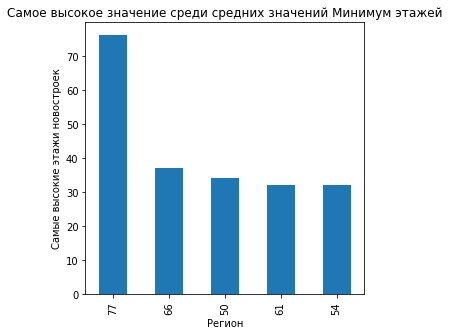

In [55]:
# Визуализируем топ 5 значений
rcParams['figure.figsize'] = 5,5
df_floors_3.plot(kind='bar') 
plt.title("Самое высокое значение среди средних значений Минимум этажей")
plt.xlabel('Регион')
plt.ylabel('Самые высокие этажи новостроек')
plt.show()

In [56]:
# Вычисляем регион в котором самое минимальное значение среди значений "Минимум этажей"
df_floors_4 = df_6_clean.groupby('Регион')['Минимум этажей'].min().sort_values(ascending=True)
df_floors_4.head(3)

Регион
1     1
66    1
52    1
Name: Минимум этажей, dtype: int64

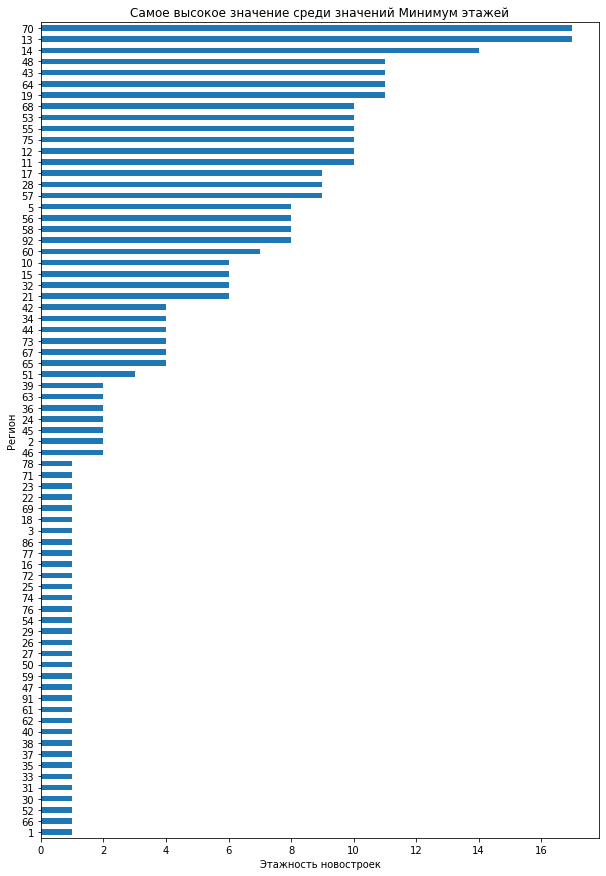

In [57]:
# Визуализируем
rcParams['figure.figsize'] = 10,15
df_floors_4.plot(kind='barh') 
plt.title("Cамое высокое значение среди значений Минимум этажей")
plt.xlabel('Этажность новостроек')
plt.ylabel('Регион')
plt.show()

In [58]:
# Трансформируем сириес в датафрейм, чтобы потом посчитать количество регионов с одноэтажными постройками
df_floors_5 = df_floors_4.reset_index()
df_floors_5.head(3)

,Регион,Минимум этажей
0,1,1
1,66,1
2,52,1


In [59]:
df_floors_5['Минимум этажей'].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 14, 17])

In [60]:
# Посчитаем количество одноэтажных домов
df_floors_6 = df_floors_5.groupby('Минимум этажей')['Регион'].count()
df_floors_6

Минимум этажей
1     34
2      7
3      1
4      6
6      4
7      1
8      4
9      3
10     6
11     4
14     1
17     2
Name: Регион, dtype: int64

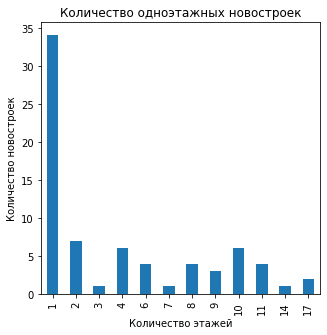

In [61]:
# Визуализируем
rcParams['figure.figsize'] = 5,5
df_floors_6.plot(kind='bar') 
plt.title("Количество одноэтажных новостроек")
plt.xlabel('Количество этажей')
plt.ylabel('Количество новостроек')
plt.show()

**Вывод:**
* Самое высокое среднее значение по максимуму этажей в регионе - 77
* Самое высокое среднее значение по минимум этажей в регионе - 48
* Самые высокие новостройки в регионе - 77
* Новостройки с одним этажом присутствуют в 34 регионах. 

**Задание 5**

In [62]:
# Количество квартир в разных регионах
df_7_clean = df_2_clean.copy()

In [63]:
df_7_clean.head(2)

,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,Минимум этажей,Грузоподъемность лифтов,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Год сдачи,Месяц сдачи,День недели сдачи
0,1259,"""СМАРТ дом на Новоселов""","г Рязань, улица Бугровка, д. 0",62,2023-12-31,63806,Типовой,440,27,27,4,0,0,1,0,КРИСТАЛЛ,2023,12,Sunday
1,1284,"Жилой Комплекс ""Мир Митино"" (сокращенное наиме...","г Москва, район внутригородское муниципальное ...",77,2024-12-31,40330,Типовой,1115,27,27,14,0,0,1,2,РОЖДЕСТВЕНО,2024,12,Tuesday


In [64]:
# Оставляем нужные столбцы
df_7_clean = df_7_clean[['Регион','id','Кол-во квартир',]]
df_7_clean.head(3)

,Регион,id,Кол-во квартир
0,62,1259,440
1,77,1284,1115
2,18,1804,168


In [65]:
# Вычисляем количество квартир в разных регионах
df_flat_1 = df_7_clean.groupby('Регион')['Кол-во квартир'].count()
df_flat_1.head(5)

Регион
1     25
2     27
3     11
5      4
10     8
Name: Кол-во квартир, dtype: int64

In [66]:
# Делаем датафрейм для визуализации
df_flat_2 = df_flat_1.reset_index()
df_flat_2.head()

,Регион,Кол-во квартир
0,1,25
1,2,27
2,3,11
3,5,4
4,10,8


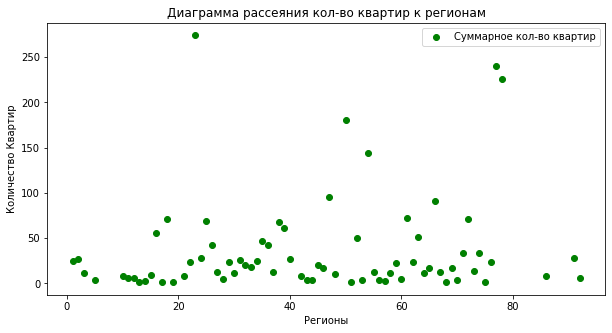

In [67]:
rcParams['figure.figsize'] = 10,5
plt.scatter(df_flat_2['Регион'], df_flat_2['Кол-во квартир'] ,label='Суммарное кол-во квартир', color='g')   
plt.xlabel('Регионы')   
plt.ylabel('Количество Квартир')   
plt.title('Диаграмма рассеяния кол-во квартир к регионам')   
plt.legend()   
plt.show() 

**Вывод**
* До 40 квартир будет сдано практически во всех регионах
* Все регионы с номером 80+ имеют просадку по количеству сдаваемого жилья
* Обнаружены аномально высокие значения 
  * В регионе с 20-25
  * В регионе с 77-80
  * В регионе с 48-52
  * Эти данные нужно будет проверить дополнительно

**Задание 6**

In [68]:
# Жилую площадь в разных регионах
df_8_clean = df_2_clean.copy()
df_8_clean.head(2)

,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,Минимум этажей,Грузоподъемность лифтов,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Год сдачи,Месяц сдачи,День недели сдачи
0,1259,"""СМАРТ дом на Новоселов""","г Рязань, улица Бугровка, д. 0",62,2023-12-31,63806,Типовой,440,27,27,4,0,0,1,0,КРИСТАЛЛ,2023,12,Sunday
1,1284,"Жилой Комплекс ""Мир Митино"" (сокращенное наиме...","г Москва, район внутригородское муниципальное ...",77,2024-12-31,40330,Типовой,1115,27,27,14,0,0,1,2,РОЖДЕСТВЕНО,2024,12,Tuesday


In [69]:
# На этом моменте я обнаружил, что ранее не скачивал данные по жил. площади, поэтому в 
# текущем ноутбуке выгружу новы df, для реализации задачи

In [70]:
import requests
from collections import defaultdict
from tqdm.auto import tqdm

Описание ниже проводимых шагов можно посмотреть здесь
https://github.com/IKAR42/SberDS_Study/blob/main/Python_%22Task1_dmrf_ipynb%22.ipynb

In [ ]:
offset_ = 1
limit_ = 5000
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()
objects_data.get('data').get('list')[0]

{'hobjId': 39024,
 'objId': 13383,
 'developer': {'devId': 306,
  'shortName': '2МЕН ГРУПП',
  'fullName': '2МЕН ГРУПП',
  'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
  'orgForm': {'id': 1, 'fullForm': 'Акционерное общество', 'shortForm': 'АО'},
  'companyGroup': 5776,
  'devInn': '7701651356'},
 'rpdRegionCd': 72,
 'objAddr': 'г Тюмень',
 'objFloorMin': 4,
 'objFloorMax': 20,
 'objElemLivingCnt': 68,
 'objReady100PercDt': '2023-03-31',
 'objSquareLiving': 6296.55,
 'objCompensFundFlg': 1,
 'objProblemFlg': 0,
 'latitude': 57.1519,
 'longitude': 65.5536,
 'problemFlag': 'NONE',
 'siteStatus': 'Строящиеся',
 'objGuarantyEscrowFlg': 0,
 'residentialBuildings': 1,
 'rpdNum': '72-000095',
 'pdId': 28105,
 'buildType': 'Жилое',
 'objStatus': 0}

In [ ]:
objects_list = objects_data.get('data').get('list')
obj_ids = [x.get('objId') for x in objects_list]
obj_ids[:10]
len(obj_ids)

5000

In [ ]:
tab_dict_7 = defaultdict(list)

In [ ]:
for id in tqdm(obj_ids):
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{id}'
    res = requests.get(url)
    one_object = res.json()
    tab_dict_7['Регион'].append(one_object.get('data').get('region'))
    tab_dict_7['Жил. площадь'].append(one_object.get('data').get('objSquareLiving'))

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
df_11 = pd.DataFrame(tab_dict_7)
df_11.head(5)

,Регион,Жил. площадь
0,72,6296.55
1,72,4812.98
2,72,6248.51
3,72,0.00
4,26,8295.20


In [ ]:
df_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Регион        5000 non-null   int64  
 1   Жил. площадь  5000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.2 KB


In [ ]:
df_11.to_excel("./drive/MyDrive/Hometask 2(excel).xlsx", index=False)

In [71]:
# Т.к. доделывал в другой день, заново подгрузил дата сет
df_12 = pd.read_excel("./drive/MyDrive/Hometask 2(excel).xlsx")
df_12.head(3)

,Регион,Жил. площадь
0,72,6296.55
1,72,4812.98
2,72,6248.51


In [72]:
# Делаем агрегат
df_sl = df_12.groupby('Регион')['Жил. площадь'].count()
df_sl.head()

Регион
1    33
2    94
3    31
4     1
5    11
Name: Жил. площадь, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


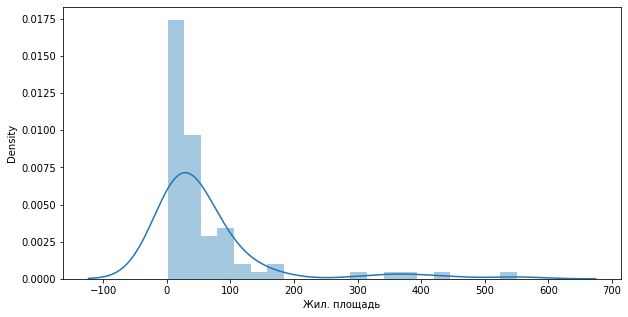

In [73]:
# Визуализируем
import seaborn as sns
sns_plot = sns.distplot(df_sl)
fig = sns_plot.get_figure()

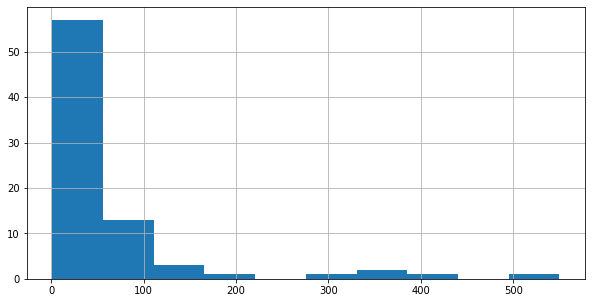

In [74]:
# Визуализируем
q = df_sl.hist()
fig = q.get_figure()

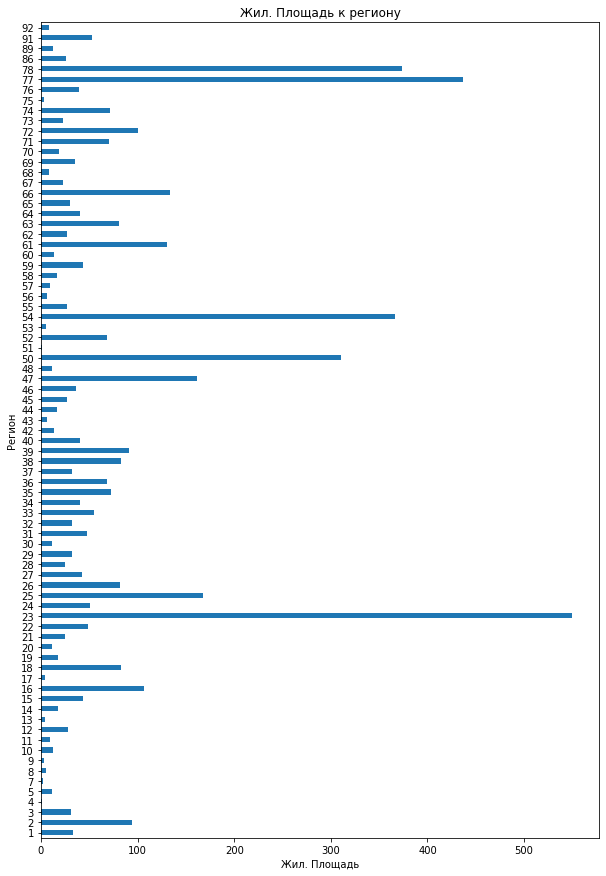

In [75]:
# Визуализируем
rcParams['figure.figsize'] = 10,15
df_sl.plot(kind='barh') 
plt.title("Жил. Площадь к региону")
plt.xlabel('Жил. Площадь')
plt.ylabel('Регион')
plt.show()

**Вывод:**
* Самое большое количество жил. площади планируется сдать в регионах
  * 23 - Краснодарский край
  * 77 - г. Москва
  * 78 - Санкт-Петербург
* Во всех регионах планируются к сдаче обьекты с жилплощадью до 50 кв.м.

**Задание 7**

In [76]:
# Количество парковочных мест в разных регионах
df_9_clean = df_2_clean.copy()
df_9_clean.head(2)

,id,Название обьекта,Адрес,Регион,Срок сдачи,Стоимость м.кв.,Класс жилья,Кол-во квартир,Максимум этажей,Минимум этажей,Грузоподъемность лифтов,Парковочные места,Наличие велодорожки,Детские площадки,Спортивные площадки,Застройщик,Год сдачи,Месяц сдачи,День недели сдачи
0,1259,"""СМАРТ дом на Новоселов""","г Рязань, улица Бугровка, д. 0",62,2023-12-31,63806,Типовой,440,27,27,4,0,0,1,0,КРИСТАЛЛ,2023,12,Sunday
1,1284,"Жилой Комплекс ""Мир Митино"" (сокращенное наиме...","г Москва, район внутригородское муниципальное ...",77,2024-12-31,40330,Типовой,1115,27,27,14,0,0,1,2,РОЖДЕСТВЕНО,2024,12,Tuesday


In [77]:
# Оставляем нужные столбцы
df_9_clean = df_9_clean[['Регион','id','Парковочные места',]]
df_9_clean.head(3)

,Регион,id,Парковочные места
0,62,1259,0
1,77,1284,0
2,18,1804,0


In [78]:
# Делаем агрегат
df_car_1 = df_9_clean.groupby('Регион')['Парковочные места'].count()
df_car_1.head(3)

Регион
1    25
2    27
3    11
Name: Парковочные места, dtype: int64

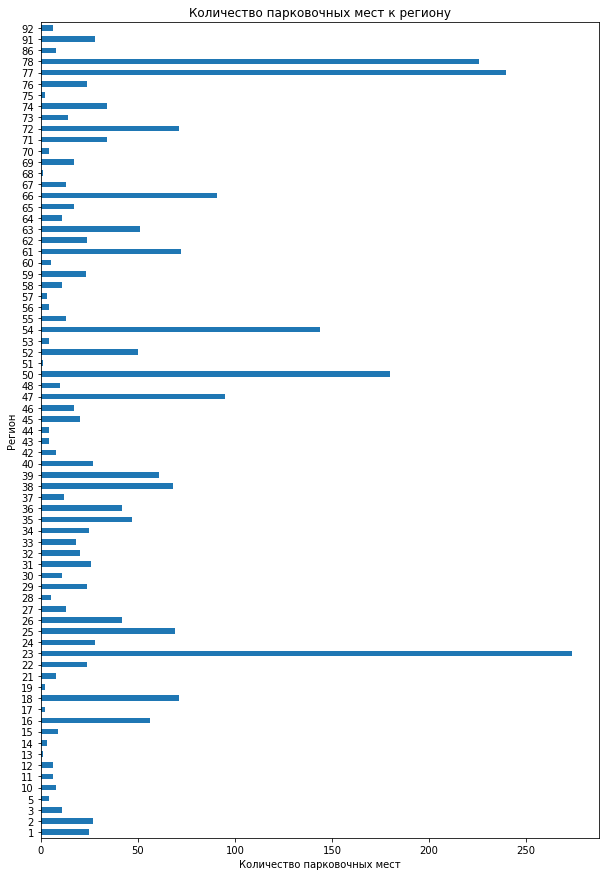

In [79]:
# Визуализируем
rcParams['figure.figsize'] = 10,15
df_car_1.plot(kind='barh') 
plt.title("Количество парковочных мест к региону")
plt.xlabel('Количество парковочных мест')
plt.ylabel('Регион')
plt.show()

**Вывод:**
* Количество парковочных мест имеет прямую корреляцию с количеством вводимой жилой площади, что позитивно скажется на инфраструктуре

### Homework 3. Классы (ООП)

## Задание 1 (Класс для загрузки данных)

In [241]:
# Запускаем код для инициализации класса
class ObjectInfoExtractor:
    def __init__(self):
        import requests
        from collections import defaultdict
        import pandas as pd
        from tqdm.auto import tqdm
        self.ids = None
        self.tab_dict = None
        print(f'Класс инициализирован. Библиотеки загружены')

    def load_id(self, ids):
        offset_ = 1
        limit_ = 10
        url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
        res = requests.get(url)
        objects_data = res.json()
        objects_list = objects_data.get('data').get('list')
        self.ids = [x.get('objId') for x in objects_list]
        print(f'Id объектов загружены')
          
    def make_dict(self, tab_dict):
        self.tab_dict = defaultdict(list)
        for id in tqdm(self.ids):
          url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{id}'
          res = requests.get(url)
          one_object = res.json()
          self.tab_dict['id'].append(one_object.get('data').get('id'))
          self.tab_dict['Название обьекта'].append(one_object.get('data').get('nameObj'))
          self.tab_dict['Адрес'].append(one_object.get('data').get('address'))
          self.tab_dict['Регион'].append(one_object.get('data').get('region'))
          self.tab_dict['Срок сдачи'].append(one_object.get('data').get('objReady100PercDt'))
        print(f'Словарь создан. Данные загружены') 

    def df_excel_save(self):
        df_conv = pd.DataFrame(self.tab_dict)
        x = df_conv.to_excel("./drive/MyDrive/conv_excel_1.xlsx")
        print(f'Файл в формате excel сохранен на Ваш Google диск')

In [242]:
# Инициализируем класс
w = ObjectInfoExtractor()

Класс инициализирован. Библиотеки загружены


In [243]:
# Загружаем id обьектов
w.load_id('ids')

Id объектов загружены


In [244]:
# Делаем словарь с атрибутами на основании выгруженных id
w.make_dict('tab_dict')

  0%|          | 0/10 [00:00<?, ?it/s]

Словарь создан. Данные загружены


In [245]:
# Сохраняем файл на диск для дальнейшей работы
w.df_excel_save()

Файл в формате excel сохранен на Ваш Google диск


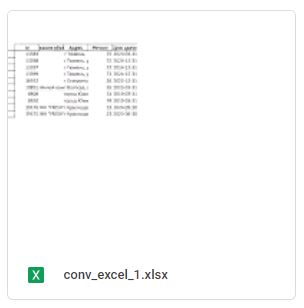

## Задание 2 (Класс для сохранения данных)

In [129]:
# Запускаем код для создания класса
class Saver:
    def __init__(self, table_name):                  
        self.table_name = df
        print(f'Класс инициализирован. Таблица загружена.')

    def saver_csv (self):
        m = (self.table_name).to_csv("./drive/MyDrive/saver_csv_1.csv")
        print(f'Файл в формате csv сохранен на Ваш Google диск')

    def saver_excel (self):
        x = (self.table_name).to_excel("./drive/MyDrive/saver_excel_1.xlsx")
        print(f'Файл в формате excel сохранен на Ваш Google диск')
    
    def saver_sql (self):
        import sqlite3
        conn = sqlite3.connect('home_rf')
        k = (self.table_name).to_sql('HomeRF_tab', conn, if_exists= 'replace', index = False)
        print(f'Файл в формате БД сохранен на Ваш Google диск')

In [80]:
# Делаем копию сэмпла данных
df_1_oop = df_2_clean.copy()

In [96]:
# Определяем датафрейм для работы с классом и объявляем df
df_1_oop.head(5)
df = df_1_oop.head(5)

In [131]:
# Инициализируем класс
d = Saver(df)

Класс инициализирован. Таблица загружена.


In [126]:
# Метод сохранения в csv
d.saver_csv()

Файл в формате csv сохранен на Ваш Google диск


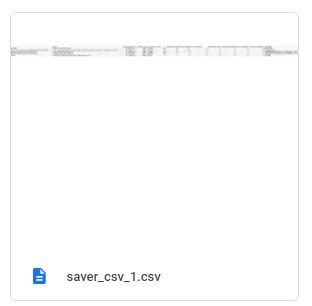

In [114]:
# Метод сохранения в excel
d.saver_excel()

Файл в формате excel сохранен на Ваш Google диск


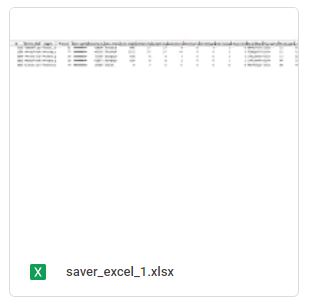

In [132]:
# Метод сохранения в формате БД
d.saver_sql()

Файл в формате БД сохранен на Ваш Google диск


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


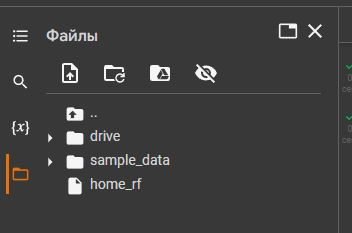

## Задание 3 (Класс для визуализации данных)

In [162]:
# Делаем копию сэмпла данных
df_2_viz = df_2_clean.copy()

In [163]:
# Запускаем код для создания класса
class Visualizer:
    def __init__(self, table_name):                  
        self.table_name = df
        print(f'Класс инициализирован. Таблица загружена.')

    def chart(self):
        df_viz = (self.table_name).groupby('День недели сдачи')['Класс жилья'].count().sort_values(ascending=True)
        rcParams['figure.figsize'] = 10,5
        plt.plot(df_viz)
        plt.title('Анализ сдаваемого жилья относительно дней недели')
        plt.xlabel('День недели')
        plt.ylabel('Объем сдаваемого жилья')
        plt.show()
        print(f'График построен')

    def bar_hist(self):
        df_viz_1 = (self.table_name).groupby('Класс жилья')['День недели сдачи'].count().sort_values(ascending=True)
        rcParams['figure.figsize'] = 5,5
        df_viz_1.plot(kind='barh') 
        plt.title("Аналитика по классу сдаваемого жилья")
        plt.xlabel('Объем сдаваемого жилья')
        plt.ylabel('Класс жилья')
        plt.show()

In [168]:
# Объявляем df и инициализируем класс
df = df_2_viz
h = Visualizer(df_2_viz)

Класс инициализирован. Таблица загружена.


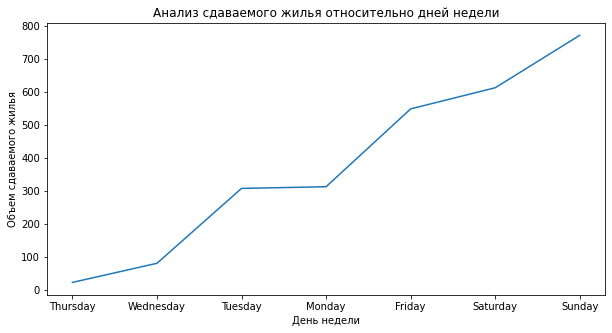

График построен


In [166]:
# Используем метод Chart для построения графика
h.chart()

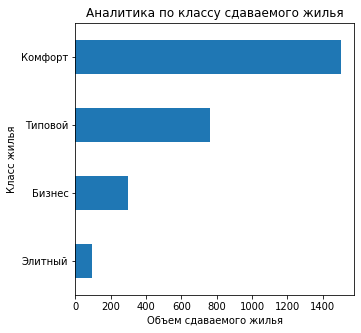

In [167]:
# Используем метод Bar_hist для построения гистограммы
h.bar_hist()